### Conduct Exploratory Data Analysis (EDA) on Benin-Malanville Data

In [1]:
# Import the pandas library for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os,sys
from pandas.plotting import scatter_matrix 

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)
from scripts.utils import plot_time_series, ploat_correlation_analysis,ploat_wind_analysis

In [2]:
# Import the dataframe from csv
# benin-malanville data

df_benin = pd.read_csv('../data/benin-malanville.csv')

#### Understanding the data/DataFrame

In [3]:
# The first 5 rows of the dataset

df_benin.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
# The last 5 rows of the dataset

df_benin.tail(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [5]:
# Information about the dataframe
    # consists all columns
    # number of rows
    # number of columns
    # data types of columns
    # memory usage

df_benin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
# Shape of the dataframe

df_benin.shape

(525600, 19)

In [7]:
# Check null values

null_values = df_benin.isnull().sum()
null_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:
# Data summary

df_benin.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


#### Summary Statistics


In [9]:
# Calculate the mean, median, standard deviation, and 
# Other statistical measures for each numeric column to understand data distribution.

In [10]:
# Mean

numeric_df = df_benin.select_dtypes(include=['number'])
numeric_df.mean()

GHI              240.559452
DNI              167.187516
DHI              115.358961
ModA             236.589496
ModB             228.883576
Tamb              28.179683
RH                54.487969
WS                 2.121113
WSgust             2.809195
WSstdev            0.473390
WD               153.435172
WDstdev            8.582407
BP               994.197199
Cleaning           0.000923
Precipitation      0.001905
TModA             35.246026
TModB             32.471736
Comments                NaN
dtype: float64

In [11]:
# Median

numeric_df = df_benin.select_dtypes(include=['number'])
numeric_df.median()

GHI                1.8
DNI               -0.1
DHI                1.6
ModA               4.5
ModB               4.3
Tamb              28.0
RH                55.1
WS                 1.9
WSgust             2.6
WSstdev            0.5
WD               181.0
WDstdev            8.6
BP               994.0
Cleaning           0.0
Precipitation      0.0
TModA             30.0
TModB             28.9
Comments           NaN
dtype: float64

In [12]:
# Standard deviation

numeric_df = df_benin.select_dtypes(include=['number'])
numeric_df.std()

GHI              331.131327
DNI              261.710501
DHI              158.691074
ModA             326.894859
ModB             316.536515
Tamb               5.924297
RH                28.073069
WS                 1.603466
WSgust             2.029120
WSstdev            0.273395
WD               102.332842
WDstdev            6.385864
BP                 2.474993
Cleaning           0.030363
Precipitation      0.037115
TModA             14.807258
TModB             12.348743
Comments                NaN
dtype: float64

In [13]:
# Range 

numeric_df = df_benin.select_dtypes(include=['number'])
range_value = numeric_df.max() - numeric_df.min()
range_value

GHI              1425.9
DNI               960.1
DHI               771.8
ModA             1342.3
ModB             1342.3
Tamb               32.8
RH                 97.9
WS                 19.5
WSgust             26.6
WSstdev             4.2
WD                360.0
WDstdev            99.4
BP                 18.0
Cleaning            1.0
Precipitation       2.5
TModA              72.0
TModB              64.4
Comments            NaN
dtype: float64

In [14]:
# Variance

numeric_df = df_benin.select_dtypes(include=['number'])
variance_values = numeric_df.var()
variance_values

GHI              109647.955903
DNI               68492.386135
DHI               25182.856923
ModA             106860.248524
ModB             100195.365569
Tamb                 35.097295
RH                  788.097191
WS                    2.571103
WSgust                4.117327
WSstdev               0.074745
WD                10472.010561
WDstdev              40.779260
BP                    6.125591
Cleaning              0.000922
Precipitation         0.001378
TModA               219.254876
TModB               152.491463
Comments                   NaN
dtype: float64

In [15]:
# Skwiness

numeric_df = df_benin.select_dtypes(include=['number'])
numeric_df.skew()

GHI               1.028446
DNI               1.290260
DHI               1.210406
ModA              1.067416
ModB              1.076031
Tamb              0.000512
RH               -0.026653
WS                0.868406
WSgust            0.928908
WSstdev           0.695449
WD               -0.084974
WDstdev           1.070081
BP               -0.263995
Cleaning         32.874282
Precipitation    34.620445
TModA             0.677442
TModB             0.616822
Comments               NaN
dtype: float64

In [16]:
# Quartiles

numeric_df = df_benin.select_dtypes(include=['number'])
quantiles = numeric_df.quantile([0.25, 0.50, 0.75])
quantiles

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0.25,-2.0,-0.5,-2.1,0.0,0.0,24.2,28.8,1.0,1.3,0.4,59.0,3.7,993.0,0.0,0.0,24.2,23.6,NaN
0.50,1.8,-0.1,1.6,4.5,4.3,28.0,55.1,1.9,2.6,0.5,181.0,8.6,994.0,0.0,0.0,30.0,28.9,NaN
0.75,483.4,314.2,216.3,463.7,447.9,32.3,80.1,3.1,4.1,0.6,235.1,12.3,996.0,0.0,0.0,46.9,41.5,NaN


#### Data Quality Check

In [17]:
# Look for missing values

df_benin.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [18]:
# incorrect entries

incorrect_entries_GHI = (df_benin['GHI'] < 0).sum()
incorrect_entries_DNI = (df_benin['DNI'] < 0).sum()
incorrect_entries_DHI = (df_benin['DHI'] < 0).sum()

# Print the results
print("Incorrect entries in GHI:", incorrect_entries_GHI)
print("Incorrect entries in DNI:", incorrect_entries_DNI)
print("Incorrect entries in DHI:", incorrect_entries_DHI)

Incorrect entries in GHI: 258847
Incorrect entries in DNI: 275987
Incorrect entries in DHI: 259182


In [19]:
# outliers

def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

# Calculate the number of outliers for each column
outliers_ModA = detect_outliers_iqr(df_benin['ModA'])
outliers_ModB = detect_outliers_iqr(df_benin['ModB'])
outliers_WS = detect_outliers_iqr(df_benin['WS'])
outliers_WSgust = detect_outliers_iqr(df_benin['WSgust'])

# Print the results
print("Outliers in ModA:", outliers_ModA)
print("Outliers in ModB:", outliers_ModB)
print("Outliers in WS:", outliers_WS)
print("Outliers in WSgust:", outliers_WSgust)

Outliers in ModA: 98
Outliers in ModB: 240
Outliers in WS: 6717
Outliers in WSgust: 5368


#### Time Series Analysis

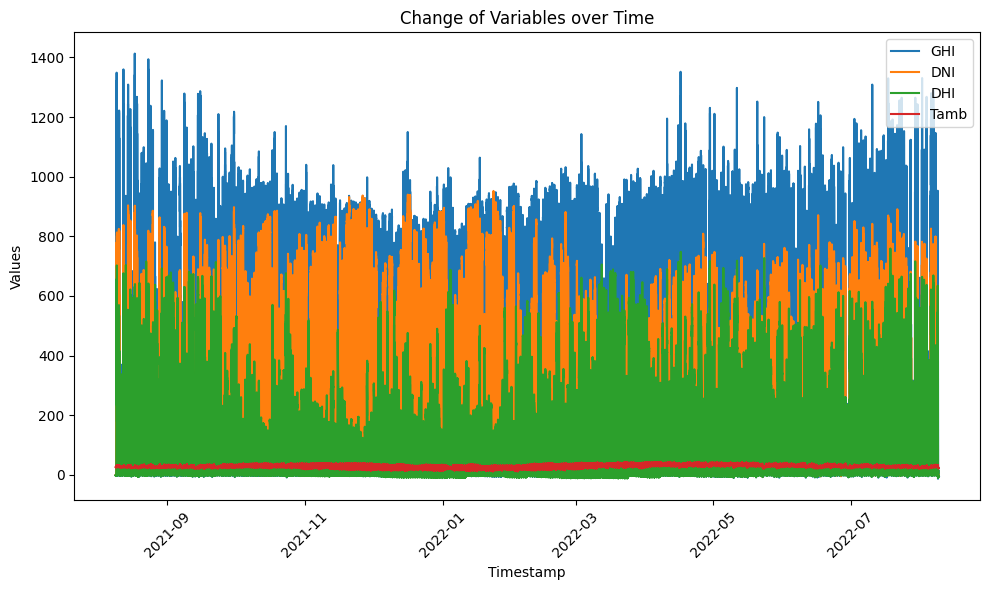

In [20]:
plot_time_series(df_benin)

#### Correlation Analysis

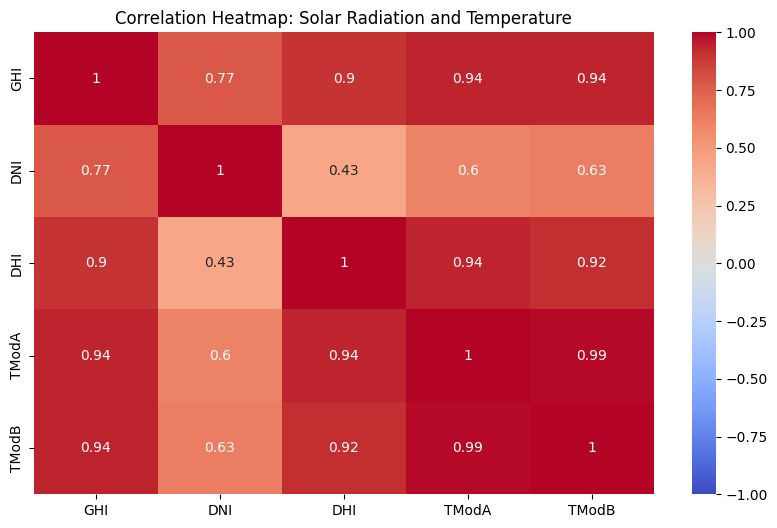

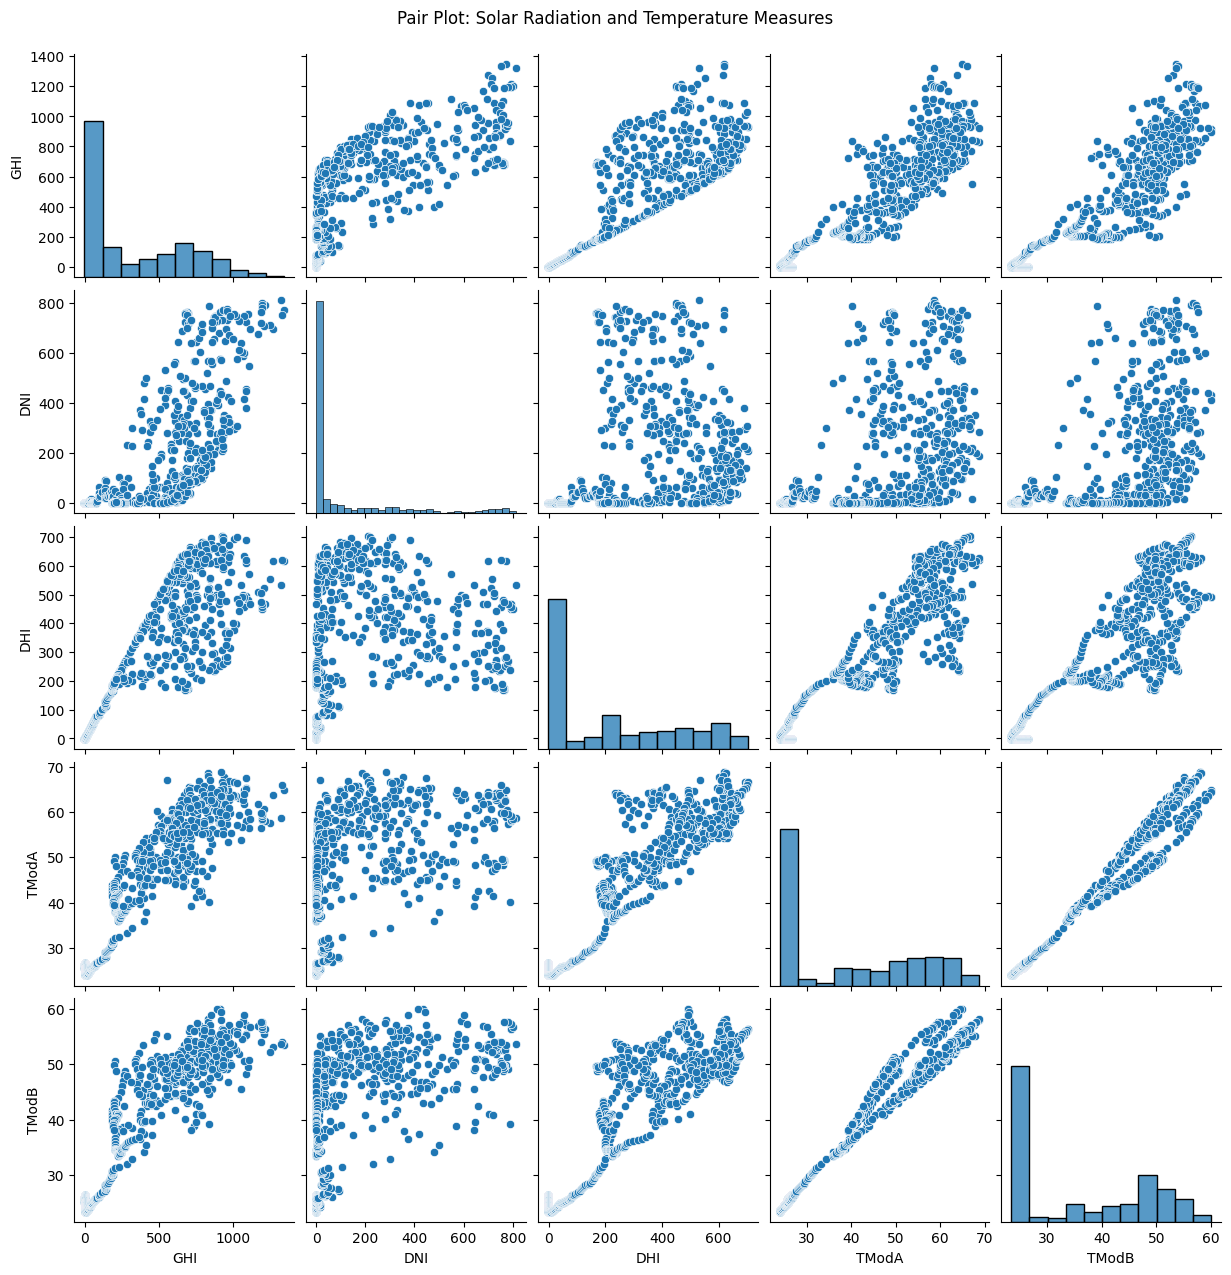

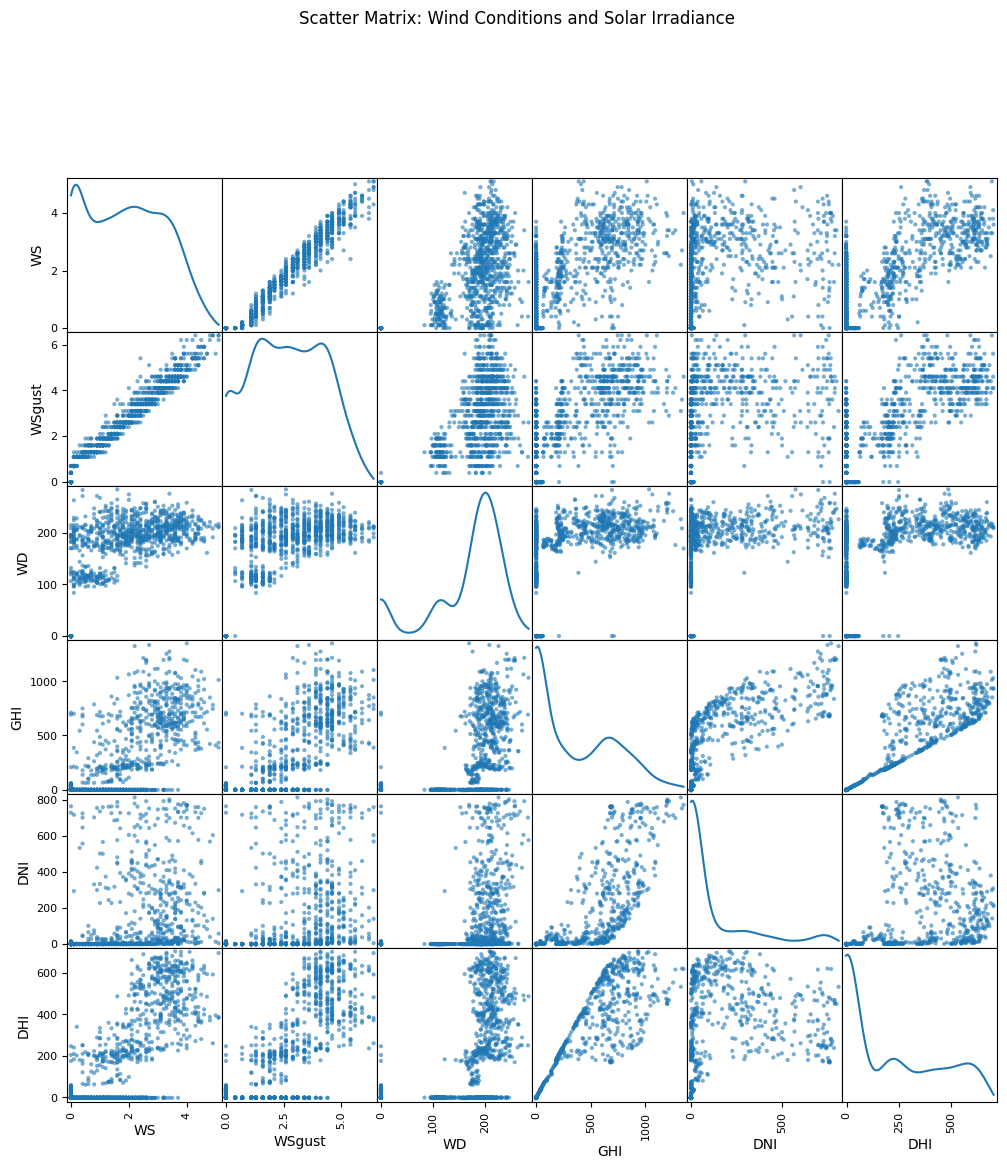

In [21]:
ploat_correlation_analysis(df_benin)